In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("glassdoor_jobs.csv")
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
data['Job Title'].value_counts()

Job Title
Data Scientist                       178
Data Engineer                         68
Senior Data Scientist                 42
Data Analyst                          18
Senior Data Engineer                  17
                                    ... 
Data Science Intern                    1
Environmental Scientist                1
Environmental Data Specialist          1
Data & Analytics Consultant (NYC)      1
Machine Learning Engineer (NLP)        1
Name: count, Length: 328, dtype: int64

In [5]:
def get_job_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [6]:
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'


In [7]:
data['jobsimp'] = data['Job Title'].apply(get_job_title)
data['jobsimp'].value_counts()

jobsimp
data scientist    358
other             238
data engineer     158
analyst           124
manager            36
mle                26
director           16
Name: count, dtype: int64

In [8]:
data['seniority'] = data['Job Title'].apply(seniority)
data['seniority'].value_counts()

seniority
na    687
sr    266
jr      3
Name: count, dtype: int64

In [9]:
data[['seniority','jobsimp']]

,seniority,jobsimp
0,na,data scientist
1,na,data scientist
2,na,data scientist
3,na,data scientist
4,na,data scientist
...,...,...
951,sr,data engineer
952,na,other
953,na,manager
954,na,data engineer


In [10]:
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: x.split('(')[0])
data['Salary Estimate']

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [11]:
data['employee'] = data['Salary Estimate'].apply(lambda x: 1 if 'employee provided salary' in x.lower() else 0)
data['per hour'] = data['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
data[['employee','per hour']]

,employee,per hour
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
951,0,0
952,0,0
953,0,0
954,0,0


In [12]:
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: x.replace('$',''))
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: x.replace('K',''))
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: x.lower().replace('employer provided salary',''))
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: x.replace(':',''))
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: x.lower().replace('per hour',''))
data['Salary Estimate']

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954         -1
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [13]:
data['minsal'] = data['Salary Estimate'].apply(lambda x: x.split('-')[0])
data['minsal'] = pd.to_numeric(data['minsal'])
data['minsal']

0      53.0
1      63.0
2      80.0
3      56.0
4      86.0
       ... 
951    72.0
952    56.0
953    95.0
954     NaN
955    61.0
Name: minsal, Length: 956, dtype: float64

In [14]:
data['maxsal'] = data['Salary Estimate'].apply(lambda x: x.split('-')[1])
data['maxsal'] = pd.to_numeric(data['maxsal'])
data['maxsal']

0       91
1      112
2       90
3       97
4      143
      ... 
951    133
952     91
953    160
954      1
955    126
Name: maxsal, Length: 956, dtype: int64

In [15]:
data['Salary Estimate'] = (data['minsal']+data['maxsal'])//2
data['Salary Estimate']

0       72.0
1       87.0
2       85.0
3       76.0
4      114.0
       ...  
951    102.0
952     73.0
953    127.0
954      NaN
955     93.0
Name: Salary Estimate, Length: 956, dtype: float64

In [16]:
data['Company Name'] = data['Company Name'].apply(lambda x: x.split('\n')[0])
data['Company Name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
954                                     IGNW
955             Riverside Research Institute
Name: Company Name, Length: 956, dtype: object

In [17]:
data['locstate'] = data['Location'].apply(lambda x: x.split(',')[1] if ',' in x else x)
data['locstate']

0       NM
1       MD
2       FL
3       WA
4       NY
      ... 
951     TN
952     PA
953     PA
954     TX
955     OH
Name: locstate, Length: 956, dtype: object

In [18]:
data['hqstate'] = data['Headquarters'].apply(lambda x: x.split(',')[1] if ',' in x else x)
data['hqstate']

0       CA
1       MD
2       FL
3       WA
4       NY
      ... 
951     CA
952     PA
953     PA
954     OR
955     VA
Name: hqstate, Length: 956, dtype: object

In [19]:
data['Company Age'] = data['Founded'].apply(lambda x: 0 if x<1 else 2024-x)
data['Company Age']

0      51
1      40
2      14
3      59
4      26
       ..
951    18
952    40
953     0
954     9
955    57
Name: Company Age, Length: 956, dtype: int64

In [20]:
data['No of competitors'] = data['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)
data['No of competitors']

0      0
1      0
2      0
3      3
4      3
      ..
951    3
952    0
953    0
954    1
955    0
Name: No of competitors, Length: 956, dtype: int64

In [21]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,jobsimp,seniority,employee,per hour,minsal,maxsal,locstate,hqstate,Company Age,No of competitors
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,data scientist,na,0,0,53.0,91,NM,CA,51,0
1,Healthcare Data Scientist,87.0,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,data scientist,na,0,0,63.0,112,MD,MD,40,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,data scientist,na,0,0,80.0,90,FL,FL,14,0
3,Data Scientist,76.0,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,data scientist,na,0,0,56.0,97,WA,WA,59,3
4,Data Scientist,114.0,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,data scientist,na,0,0,86.0,143,NY,NY,26,3


In [22]:
data['Salary Estimate'].isna().sum()

214

In [23]:
data = data[data['Salary Estimate'].notna()]
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,jobsimp,seniority,employee,per hour,minsal,maxsal,locstate,hqstate,Company Age,No of competitors
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,data scientist,na,0,0,53.0,91,NM,CA,51,0
1,Healthcare Data Scientist,87.0,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,data scientist,na,0,0,63.0,112,MD,MD,40,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,data scientist,na,0,0,80.0,90,FL,FL,14,0
3,Data Scientist,76.0,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,data scientist,na,0,0,56.0,97,WA,WA,59,3
4,Data Scientist,114.0,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,data scientist,na,0,0,86.0,143,NY,NY,26,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",84.0,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,other,sr,0,0,58.0,111,MA,United Kingdom,194,3
951,Senior Data Engineer,102.0,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,data engineer,sr,0,0,72.0,133,TN,CA,18,3
952,"Project Scientist - Auton Lab, Robotics Institute",73.0,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,other,na,0,0,56.0,91,PA,PA,40,0
953,Data Science Manager,127.0,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,manager,na,0,0,95.0,160,PA,PA,0,0


In [24]:
data['Size'].value_counts()

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: count, dtype: int64

In [25]:
data['Size'] = data['Size'].apply(lambda x: 'Unknown' if x=='-1' else x)
data['Size'].value_counts()

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: count, dtype: int64

In [26]:
data['Type of ownership'] = data['Type of ownership'].apply(lambda x: 'Unknown' if x=='-1' else x)
data['Type of ownership'].value_counts()

Type of ownership
Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
Unknown                             2
School / School District            2
Name: count, dtype: int64

In [27]:
data['Industry'] = data['Industry'].apply(lambda x: 'Unknown' if x=='-1' else x)
data['Industry'].value_counts().head(15)

Industry
Biotech & Pharmaceuticals                  112
Insurance Carriers                          63
Computer Hardware & Software                59
IT Services                                 50
Health Care Services & Hospitals            49
Enterprise Software & Network Solutions     42
Internet                                    29
Consulting                                  29
Aerospace & Defense                         25
Advertising & Marketing                     25
Consumer Products Manufacturing             20
Research & Development                      19
Colleges & Universities                     16
Energy                                      14
Banks & Credit Unions                       12
Name: count, dtype: int64

In [28]:
data['Sector'] = data['Sector'].apply(lambda x: 'Unknown' if x=='-1' else x)
data['Sector'].value_counts()

Sector
Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
Unknown                                10
Non-Profit                              9
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry     

In [29]:
data['Revenue'] = data['Revenue'].apply(lambda x: 'Unknown / Non-Applicable' if x=='-1' else x)
data['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: count, dtype: int64

In [30]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'jobsimp', 'seniority', 'employee', 'per hour', 'minsal', 'maxsal',
       'locstate', 'hqstate', 'Company Age', 'No of competitors'],
      dtype='object')

In [31]:
data['Salary Estimate'][data['per hour']==1] = data['Salary Estimate'][data['per hour']==1].apply(lambda x: x*2496//1000)
data['Salary Estimate'][data['per hour']==1]

C:\Users\akhil\AppData\Local\Temp\ipykernel_12492\1859768503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary Estimate'][data['per hour']==1] = data['Salary Estimate'][data['per hour']==1].apply(lambda x: x*2496//1000)


197    49.0
209    67.0
240    52.0
247    67.0
257    49.0
307    49.0
337    67.0
427    52.0
437    77.0
456    67.0
464    64.0
522    62.0
523    32.0
632    52.0
652    77.0
682    67.0
694    64.0
786    62.0
787    32.0
823    92.0
854    52.0
875    77.0
919    67.0
936    64.0
Name: Salary Estimate, dtype: float64

In [32]:
data['Salary Estimate']

0       72.0
1       87.0
2       85.0
3       76.0
4      114.0
       ...  
950     84.0
951    102.0
952     73.0
953    127.0
955     93.0
Name: Salary Estimate, Length: 742, dtype: float64

In [33]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,jobsimp,seniority,employee,per hour,minsal,maxsal,locstate,hqstate,Company Age,No of competitors
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,data scientist,na,0,0,53.0,91,NM,CA,51,0
1,Healthcare Data Scientist,87.0,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,data scientist,na,0,0,63.0,112,MD,MD,40,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,data scientist,na,0,0,80.0,90,FL,FL,14,0
3,Data Scientist,76.0,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,data scientist,na,0,0,56.0,97,WA,WA,59,3
4,Data Scientist,114.0,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,data scientist,na,0,0,86.0,143,NY,NY,26,3


In [34]:
data['locstate'] = data['locstate'].apply(lambda x: x.replace('Los Angeles','CA'))
data['locstate'].value_counts()

locstate
 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 NC     21
 WA     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 WI     10
 UT     10
 IN     10
 AZ      9
 MO      9
 AL      8
 GA      6
 DE      6
 KY      6
 MI      6
 CT      5
 IA      5
 LA      4
 OR      4
 NE      4
 NM      3
 KS      3
 ID      2
 MN      2
 RI      1
 SC      1
Name: count, dtype: int64

In [35]:
data['hqstate'].value_counts()

hqstate
 CA                169
 MA                 86
 NY                 63
 VA                 53
 IL                 34
 PA                 30
 NC                 27
 MD                 22
 TX                 21
 WA                 19
 FL                 18
 United Kingdom     17
 CO                 16
 Japan              14
 NJ                 13
 UT                 11
 OH                 10
 Switzerland        10
 WI                  9
 TN                  9
 DC                  9
 MO                  7
 MI                  7
 GA                  7
 IN                  7
 DE                  6
 India               5
 IA                  5
 NE                  4
 Germany             4
 AL                  3
 CT                  3
 ID                  3
 South Korea         3
 AR                  2
 AZ                  2
 France              2
 Spain               2
 Bermuda             2
-1                   1
 LA                  1
 RI                  1
 SC                  1
 MN

In [36]:
data['Same State'] = data.apply(lambda x: 1 if x.locstate==x.hqstate else 0,axis=1)
data['Same State'].value_counts()

Same State
1    506
0    236
Name: count, dtype: int64

In [37]:
data['Python_req'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data['Python_req'].value_counts()

Python_req
1    392
0    350
Name: count, dtype: int64

In [38]:
data['R_studio_req'] = data['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r_studio' in x.lower() or 'r-studio' in x.lower() or ' r ' in x.lower() else 0)
data['R_studio_req'].value_counts()

R_studio_req
0    645
1     97
Name: count, dtype: int64

In [39]:
data['C++_Java_req'] = data['Job Description'].apply(lambda x: 1 if 'c++' in x.lower() or 'java' in x.lower() else 0)
data['C++_Java_req'].value_counts()

C++_Java_req
0    574
1    168
Name: count, dtype: int64

In [40]:
data['sql_req'] = data['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
data['sql_req'].value_counts()

sql_req
1    380
0    362
Name: count, dtype: int64

In [41]:
data['aws_req'] = data['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() or 'amazon web services' in x.lower() else 0)
data['aws_req'].value_counts()

aws_req
0    563
1    179
Name: count, dtype: int64

In [42]:
data['excel_req'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
data['excel_req'].value_counts()

excel_req
1    388
0    354
Name: count, dtype: int64

In [43]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,hqstate,Company Age,No of competitors,Same State,Python_req,R_studio_req,C++_Java_req,sql_req,aws_req,excel_req
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,CA,51,0,0,1,0,0,0,0,1
1,Healthcare Data Scientist,87.0,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,40,0,1,1,0,1,0,0,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,14,0,1,1,1,0,1,0,1
3,Data Scientist,76.0,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,59,3,1,1,0,0,0,0,0
4,Data Scientist,114.0,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,26,3,1,1,0,0,1,0,1


In [44]:
data['Rating'] = data['Rating'].apply(lambda x: 0 if x<0.0 else x)
data['Rating'].value_counts()

Rating
3.9    63
3.8    61
3.7    61
3.5    49
4.0    47
3.6    46
3.4    44
3.3    39
3.2    35
4.4    33
4.3    32
4.7    31
4.2    26
3.1    25
4.1    19
2.9    18
3.0    17
2.7    14
2.6    12
0.0    11
4.6    10
4.8     9
2.4     7
2.8     7
4.5     7
2.1     5
5.0     5
1.9     3
2.3     2
2.5     2
2.2     2
Name: count, dtype: int64

In [45]:
data['Company Name'].value_counts()

Company Name
MassMutual                                         14
Reynolds American                                  14
Takeda Pharmaceuticals                             14
Software Engineering Institute                     11
PNNL                                               10
                                                   ..
Dayton Freight Lines, Inc.                          1
Community Action Partnership of San Luis Obispo     1
TrueAccord                                          1
DRB Systems                                         1
Fivestars                                           1
Name: count, Length: 343, dtype: int64

In [46]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'jobsimp', 'seniority', 'employee', 'per hour', 'minsal', 'maxsal',
       'locstate', 'hqstate', 'Company Age', 'No of competitors', 'Same State',
       'Python_req', 'R_studio_req', 'C++_Java_req', 'sql_req', 'aws_req',
       'excel_req'],
      dtype='object')

In [47]:
data['Salary Estimate'] = data['Salary Estimate'].astype(int)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,hqstate,Company Age,No of competitors,Same State,Python_req,R_studio_req,C++_Java_req,sql_req,aws_req,excel_req
0,Data Scientist,72,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,CA,51,0,0,1,0,0,0,0,1
1,Healthcare Data Scientist,87,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,40,0,1,1,0,1,0,0,0
2,Data Scientist,85,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,14,0,1,1,1,0,1,0,1
3,Data Scientist,76,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,59,3,1,1,0,0,0,0,0
4,Data Scientist,114,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,26,3,1,1,0,0,1,0,1


In [48]:
data['job_desc'] = data['Job Description'].apply(lambda x: len(x))
data['job_desc']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: job_desc, Length: 742, dtype: int64

# EDA

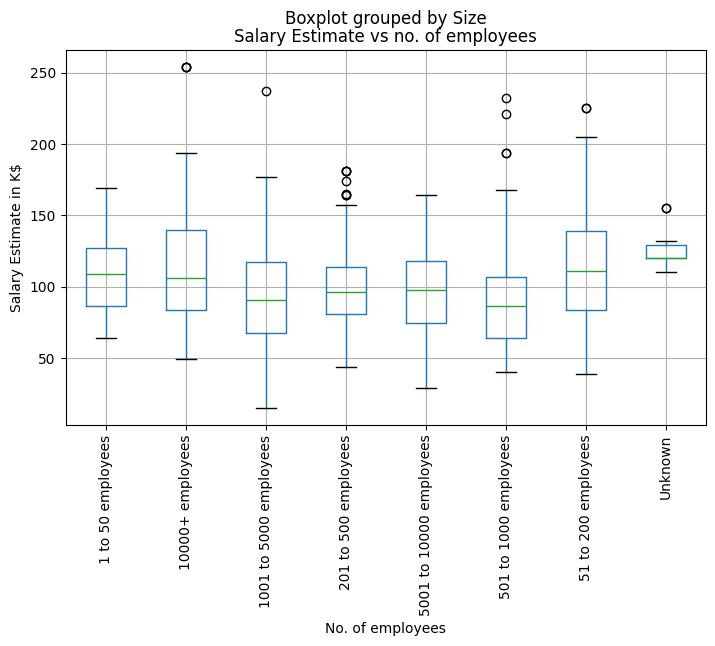

In [49]:
fig1,ax1 = plt.subplots(1,1,figsize=(8,5))
data.boxplot('Salary Estimate','Size',ax=ax1)
plt.title("Salary Estimate vs no. of employees")
plt.xlabel('No. of employees')
plt.xticks(rotation=90)
plt.ylabel('Salary Estimate in K$')
plt.show()


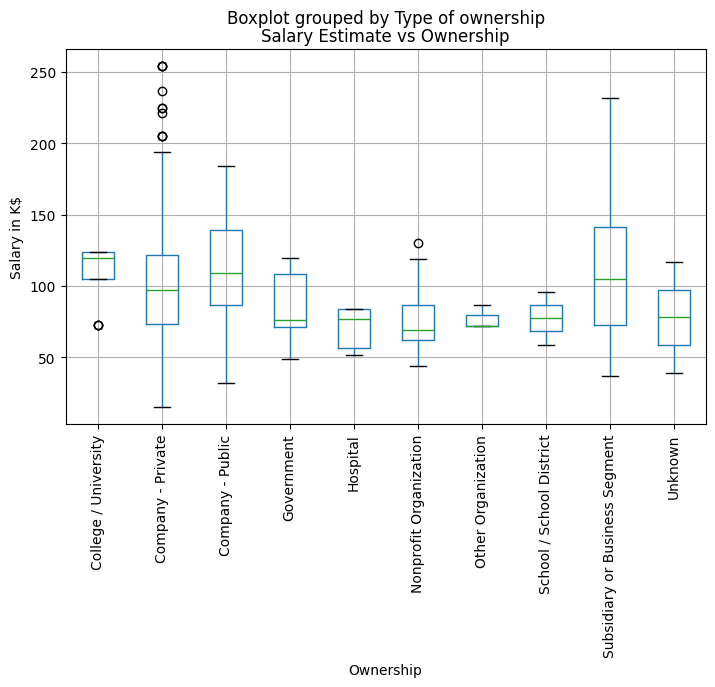

In [50]:
fig2,ax2 = plt.subplots(1,1,figsize=(8,5))
data.boxplot('Salary Estimate','Type of ownership',ax=ax2)
plt.title("Salary Estimate vs Ownership")
plt.xlabel('Ownership')
plt.xticks(rotation=90)
plt.ylabel('Salary in K$')
plt.show()

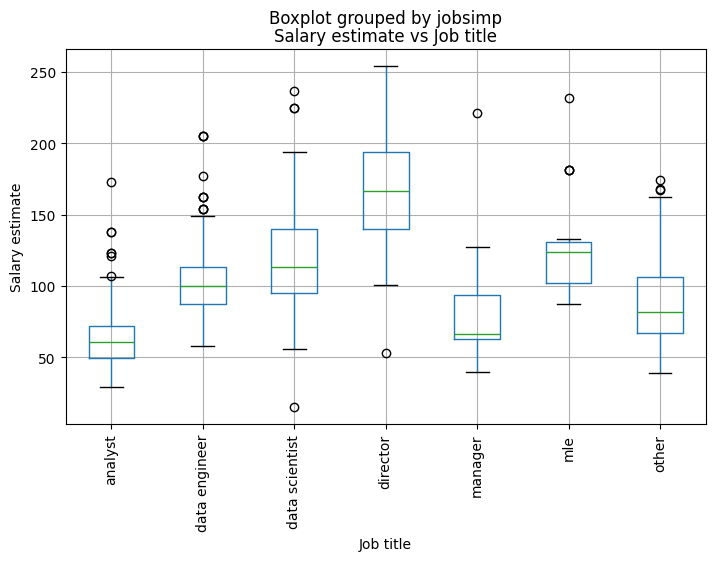

In [51]:
fig3,ax3 = plt.subplots(1,1,figsize=(8,5))
data.boxplot('Salary Estimate','jobsimp',ax=ax3)
plt.title("Salary estimate vs Job title")
plt.ylabel('Salary estimate')
plt.xlabel('Job title')
plt.xticks(rotation=90)
plt.show()

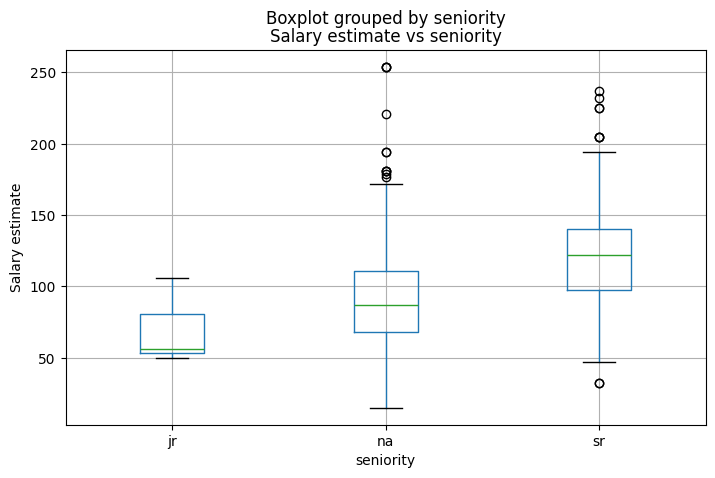

In [52]:
fig4,ax4 = plt.subplots(1,1,figsize=(8,5))
data.boxplot('Salary Estimate','seniority',ax=ax4)
plt.title("Salary estimate vs seniority")
plt.xlabel("seniority")
plt.ylabel("Salary estimate")
plt.show()

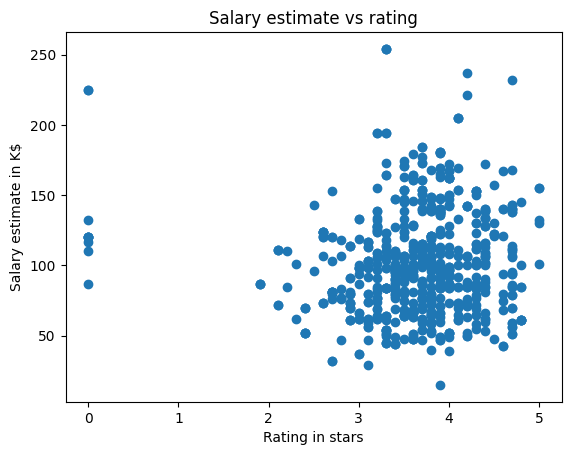

In [53]:
plt.scatter(data['Rating'],data['Salary Estimate'])
plt.title("Salary estimate vs rating")
plt.xlabel("Rating in stars")
plt.ylabel("Salary estimate in K$")
plt.show()

In [54]:
use_data = pd.DataFrame(data,columns=['Salary Estimate','Rating',
                                      'Size','Type of ownership','Industry',
                                      'Sector','Revenue','jobsimp','seniority','job_desc',
                                      'Company Age','No of competitors','Same State',
                                      'Python_req','R_studio_req','C++_Java_req','sql_req',
                                      'aws_req','excel_req'])
use_data.head()

,Salary Estimate,Rating,Size,Type of ownership,Industry,Sector,Revenue,jobsimp,seniority,job_desc,Company Age,No of competitors,Same State,Python_req,R_studio_req,C++_Java_req,sql_req,aws_req,excel_req
0,72,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),data scientist,na,2536,51,0,0,1,0,0,0,0,1
1,87,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),data scientist,na,4783,40,0,1,1,0,1,0,0,0
2,85,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),data scientist,na,3461,14,0,1,1,1,0,1,0,1
3,76,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),data scientist,na,3883,59,3,1,1,0,0,0,0,0
4,114,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,data scientist,na,2728,26,3,1,1,0,0,1,0,1


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le_size = LabelEncoder()
use_data['Size'] = le_size.fit_transform(use_data['Size'])
use_data['Size'].value_counts()

Size
2    150
5    134
1    130
3    117
6     94
4     76
0     31
7     10
Name: count, dtype: int64

In [57]:
le_own = LabelEncoder()
use_data['Type of ownership'] = le_own.fit_transform(use_data['Type of ownership'])
use_data['Type of ownership'].value_counts()

Type of ownership
1    410
2    193
5     55
8     34
3     15
4     15
0     13
6      3
9      2
7      2
Name: count, dtype: int64

In [58]:
le_ind = LabelEncoder()
use_data['Industry'] = le_ind.fit_transform(use_data['Industry'])
use_data['Industry'].value_counts()

Industry
7     112
32     63
10     59
29     50
27     49
18     42
33     29
12     29
2      25
1      25
14     20
44     19
9      16
17     14
5      12
20     11
57     10
48     10
55      8
36      8
23      8
21      8
42      8
45      7
31      6
43      6
15      6
34      5
3       4
35      4
25      4
24      4
30      4
52      4
37      4
22      4
59      3
49      3
46      3
11      3
54      3
58      3
16      3
13      3
51      2
47      2
50      2
8       2
38      2
0       1
26      1
28      1
19      1
4       1
56      1
39      1
41      1
40      1
53      1
6       1
Name: count, dtype: int64

In [59]:
le_sect = LabelEncoder()
use_data['Sector'] = le_sect.fit_transform(use_data['Sector'])
use_data['Sector'].value_counts()

Sector
12    180
4     112
5      97
13     69
11     49
9      42
14     34
1      25
8      23
20     15
18     14
10     11
24     10
17      9
22      8
19      8
23      8
21      6
15      6
3       4
7       4
16      3
6       3
2       1
0       1
Name: count, dtype: int64

In [60]:
le_revenue = LabelEncoder()
use_data['Revenue'] = le_revenue.fit_transform(use_data['Revenue'])
use_data['Revenue'].value_counts()

Revenue
12    204
3     124
4      91
0      60
10     57
9      46
6      40
5      39
2      32
7      19
8      18
1       8
11      4
Name: count, dtype: int64

In [61]:
le_job = LabelEncoder()
use_data['jobsimp'] = le_job.fit_transform(use_data['jobsimp'])
use_data['jobsimp'].value_counts()

jobsimp
2    279
6    184
1    119
0    102
4     22
5     22
3     14
Name: count, dtype: int64

In [62]:
le_seniority = LabelEncoder()
use_data['seniority'] = le_seniority.fit_transform(use_data['seniority'])
use_data['seniority'].value_counts()

seniority
1    519
2    220
0      3
Name: count, dtype: int64

In [63]:
use_data.head()

,Salary Estimate,Rating,Size,Type of ownership,Industry,Sector,Revenue,jobsimp,seniority,job_desc,Company Age,No of competitors,Same State,Python_req,R_studio_req,C++_Java_req,sql_req,aws_req,excel_req
0,72,3.8,5,1,2,1,9,2,1,2536,51,0,0,1,0,0,0,0,1
1,87,3.4,1,6,27,11,5,2,1,4783,40,0,1,1,0,1,0,0,0
2,85,4.8,5,1,45,5,4,2,1,3461,14,0,1,1,1,0,1,0,1
3,76,3.8,2,3,17,18,10,2,1,3883,59,3,1,1,0,0,0,0,0
4,114,2.9,6,1,1,5,12,2,1,2728,26,3,1,1,0,0,1,0,1


In [64]:
use_data.shape

(742, 19)

In [65]:
X = use_data.drop('Salary Estimate',axis=1)
X.shape

(742, 18)

In [66]:
y = use_data['Salary Estimate']
y.shape

(742,)

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((593, 18), (593,), (149, 18), (149,))

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [69]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred_reg = reg.predict(X_test)
y_pred_reg.shape

(149,)

In [71]:
mse_reg = mean_squared_error(y_test,y_pred_reg)
print(f"Mean squared error = {mse_reg}")
mpe_reg = mean_absolute_percentage_error(y_test,y_pred_reg)
print(f"Mean absolute percentage error = {mpe_reg*100} %")

Mean squared error = 1282.3411047856223
Mean absolute percentage error = 28.32006542873147 %


In [72]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [73]:
y_pred_dtree = dtree.predict(X_test)
y_pred_dtree.shape

(149,)

In [74]:
mse_dtree = mean_squared_error(y_test,y_pred_dtree)
print(f"Mean squared error = {mse_dtree}")
mpe_dtree = mean_absolute_percentage_error(y_test,y_pred_dtree)
print(f"Mean absolute percentage error = {mpe_dtree*100} %")

Mean squared error = 615.8120805369127
Mean absolute percentage error = 11.216604475018492 %


In [75]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()
rand.fit(X_train,y_train)

RandomForestRegressor()

In [76]:
y_pred_rand = rand.predict(X_test)
y_pred_rand.shape

(149,)

In [77]:
mse_rand = mean_squared_error(y_test,y_pred_rand)
print(f"Mean squared error = {mse_rand}")
mpe_rand = mean_absolute_percentage_error(y_test,y_pred_rand)
print(f"Mean absolute percentage error = {mpe_rand*100} %")

Mean squared error = 439.82045436241617
Mean absolute percentage error = 12.744829829127108 %


In [78]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [79]:
params = {
    'objective': 'reg:squarederror',  # for regression
    'max_depth': 4,
    'eta': 0.1,
    'eval_metric': 'rmse'
}

In [80]:
bst = xgb.train(params, dtrain, num_boost_round=100)
bst

In [81]:
y_pred = bst.predict(dtest)
y_pred.shape

(149,)

In [82]:
from sklearn.metrics import mean_squared_error
msexg = mean_squared_error(y_test, y_pred)
mpexg = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean squared error = {msexg}")
print(f"Mean absolute percentage error = {mpexg*100} %")

Mean squared error = 575.5264636167035
Mean absolute percentage error = 17.43666029844594 %


In [83]:
mean_sq_err = [mse_reg,mse_dtree,mse_rand,msexg]
mean_pc_err = [mpe_reg*100,mpe_dtree*100,mpe_rand*100,mpexg*100]
models_list = ["Linear Regression","Decision Tree","Random Forest","XGBoost"]

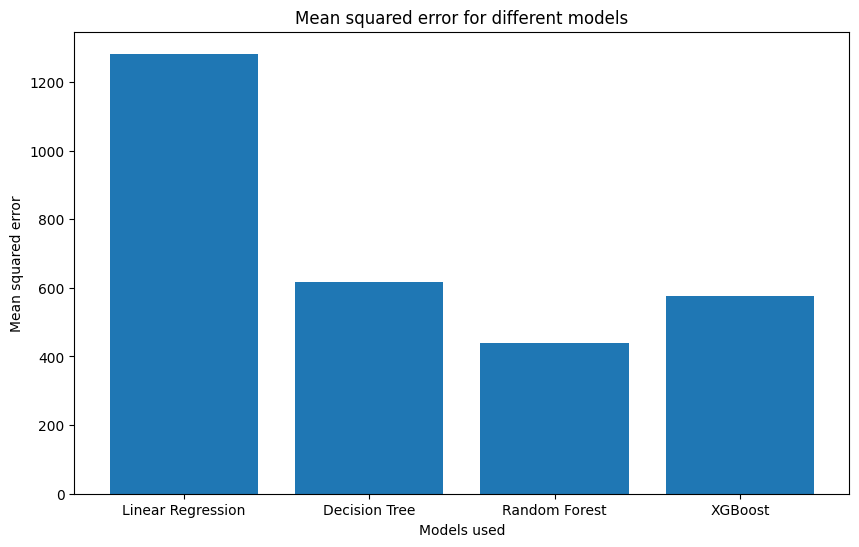

In [84]:
plt.figure(figsize=(10,6))
plt.bar(models_list,mean_sq_err)
plt.xlabel("Models used")
plt.ylabel("Mean squared error")
plt.title("Mean squared error for different models")
plt.show()

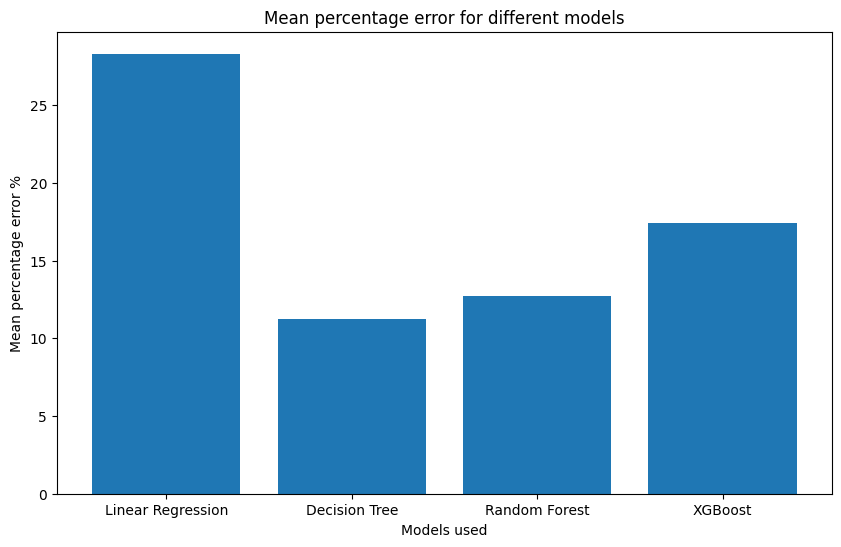

In [85]:
plt.figure(figsize=(10,6))
plt.bar(models_list,mean_pc_err)
plt.xlabel("Models used")
plt.ylabel("Mean percentage error %")
plt.title("Mean percentage error for different models")
plt.show()

In [86]:
d = dict()
d["model"] = dtree

d["le_size"] = le_size
d["le_own"] = le_own
d["le_ind"] = le_ind
d["le_sect"] = le_sect
d["le_revenue"] = le_revenue
d["le_job"] = le_job
d["le_seniority"] = le_seniority
d

{'model': DecisionTreeRegressor(),
 'le_size': LabelEncoder(),
 'le_own': LabelEncoder(),
 'le_ind': LabelEncoder(),
 'le_sect': LabelEncoder(),
 'le_revenue': LabelEncoder(),
 'le_job': LabelEncoder(),
 'le_seniority': LabelEncoder()}

In [87]:
import pickle
with open('saved.pkl','wb') as file:
    pickle.dump(d,file)

In [88]:
with open('saved.pkl','rb') as file:
    d=pickle.load(file)
d

{'model': DecisionTreeRegressor(),
 'le_size': LabelEncoder(),
 'le_own': LabelEncoder(),
 'le_ind': LabelEncoder(),
 'le_sect': LabelEncoder(),
 'le_revenue': LabelEncoder(),
 'le_job': LabelEncoder(),
 'le_seniority': LabelEncoder()}

# sample

	Rating	Size	Type of ownership	Industry	Sector	Revenue	jobsimp	seniority	job_desc	Company Age	No of competitors	Same State	Python_req	R_studio_req	C++_Java_req	sql_req	aws_req	excel_req

In [89]:
Giv = np.array([[2.5,"10000+ employees","Company - Private","Energy","Oil, Gas, Energy & Utilities",
               "$500 million to $1 billion (USD)","data scientist","jr",
               3461,7,3,1,1,0,0,1,0,1]])
Giv[:,1] = le_size.transform(Giv[:,1])
Giv[:,2] = le_own.transform(Giv[:,2])
Giv[:,3] = le_ind.transform(Giv[:,3])
Giv[:,4] = le_sect.transform(Giv[:,4])
Giv[:,5] = le_revenue.transform(Giv[:,5])
Giv[:,6] = le_job.transform(Giv[:,6])
Giv[:,7] = le_seniority.transform(Giv[:,7])

Giv.astype(float)
Giv

array([['2.5', '1', '1', '17', '18', '10', '2', '0', '3461', '7', '3',
        '1', '1', '0', '0', '1', '0', '1']], dtype='<U32')

In [90]:
Fin = dtree.predict(Giv)
Fin[0]

c:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


121.0